# Summer exam

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

In [3]:
data = pd.read_csv("data/tmdb-movies.csv")
data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

## Task 0

In [7]:
#print(data["director"])

In [10]:
fav_director = "Quentin Tarantino"

In [23]:
#with np.printoptions(threshold=sys.maxsize):
#    print(np.unique(data["cast"].str.split("|", expand=True).dropna().to_numpy().ravel()))


In [12]:
fav_actor = "Mark Hamill"

In [ ]:
#data["original_title"]

In [15]:
fav_movie = "The Hateful Eight"

In [20]:
with np.printoptions(threshold=sys.maxsize):
    genres = data["genres"].str.split("|", expand=True).dropna().to_numpy().ravel()
    print(np.unique(genres))

['Action' 'Adventure' 'Animation' 'Comedy' 'Crime' 'Documentary' 'Drama'
 'Family' 'Fantasy' 'Foreign' 'History' 'Horror' 'Music' 'Mystery'
 'Romance' 'Science Fiction' 'TV Movie' 'Thriller' 'War' 'Western']


In [24]:
fav_genre = "Science Fiction"

## Task 1

In [35]:
print(data[data["vote_count"] == data["vote_count"].max()][["original_title", "vote_count"]])
print(data[data["original_title"] == fav_movie][["original_title", "vote_count"]])

     original_title  vote_count
1919      Inception        9767
       original_title  vote_count
15  The Hateful Eight        2389


## Task 2

In [39]:
print(data[data["vote_average"] == data["vote_average"].max()][["original_title", "genres", "release_year", "vote_average"]])

                     original_title       genres  release_year  vote_average
3894  The Story of Film: An Odyssey  Documentary          2011           9.2


In [42]:
print(data[data["original_title"] == fav_movie][["original_title", "genres", "release_year", "vote_average"]])

       original_title                       genres  release_year  vote_average
15  The Hateful Eight  Crime|Drama|Mystery|Western          2015           7.4


## Task 3

In [48]:
# Longest
data.sort_values("runtime", ascending=False)[["original_title", "runtime"]].iloc[0]

original_title    The Story of Film: An Odyssey
runtime                                     900
Name: 3894, dtype: object

In [49]:
# Shortest
data.sort_values("runtime")[["original_title", "runtime"]].iloc[0]

original_title    Anarchy Parlor
runtime                        0
Name: 410, dtype: object

In [50]:
data.sort_values("runtime")[["original_title", "runtime"]].head()

,original_title,runtime
410,Anarchy Parlor,0
3857,Cell 213,0
2370,Freshman Father,0
2315,Listen to Your Heart,0
3884,eCupid,0


Будем считать, что ответом на вопрос "какой фильм самый короткий" мог бы быть любой фильм с нулевой длиной.

In [51]:
# Favorite
print(data[data["original_title"] == fav_movie][["original_title", "runtime"]])

       original_title  runtime
15  The Hateful Eight      167


## Task 4

In [63]:
companies = data["production_companies"].str.split("|", expand=True).dropna().to_numpy().ravel()
companies.shape

(5630,)

## Task 5

In [84]:
pd.Series(companies).value_counts()

Warner Bros.                                                                       97
Universal Pictures                                                                 68
Canal+                                                                             66
Twentieth Century Fox Film Corporation                                             59
Paramount Pictures                                                                 56
Relativity Media                                                                   48
Village Roadshow Pictures                                                          47
Regency Enterprises                                                                43
BBC Films                                                                          39
StudioCanal                                                                        33
UK Film Council                                                                    32
Dune Entertainment                                    

## Task 6

In [110]:
data["production_companies"].str.split("|", expand=True).count(axis=1).value_counts()

1    3440
2    2580
3    1763
5    1126
0    1030
4     927
dtype: int64

## Task 7

In [148]:
mask = np.nonzero(np.isin(data["cast"].str.split("|", expand=True).to_numpy(), fav_actor))[0]
data.iloc[mask]["vote_average"].mean()

6.444444444444445

## Task 7.1

In [185]:
recurring_actor = pd.Series(data["cast"].str.split("|", expand=True).dropna().to_numpy().ravel()).mode()[0]
recurring_actor

'Robert De Niro'

In [186]:
mask = np.nonzero(np.isin(data["cast"].str.split("|", expand=True).to_numpy(), recurring_actor))[0]
data.iloc[mask]["genres"]

51                                         Comedy
53                                   Comedy|Drama
109                         Crime|Action|Thriller
494                                         Drama
572                                        Comedy
802                          Crime|Drama|Thriller
1346                          Drama|Music|Romance
1771                                        Drama
1945                               Comedy|Romance
1953                       Action|Comedy|Thriller
2037                                        Drama
2431                                 Comedy|Crime
2590                                 Comedy|Drama
2715                        Action|Crime|Thriller
2724                        Action|Crime|Thriller
2971        Action|Adventure|Crime|Drama|Thriller
3118                                 Comedy|Drama
3385             Thriller|Mystery|Science Fiction
3422                    Action|Adventure|Thriller
3474                               Comedy|Romance


In [188]:
# Favorite
mask = np.nonzero(np.isin(data["cast"].str.split("|", expand=True).to_numpy(), fav_actor))[0]
data.iloc[mask]["genres"]

3                Action|Adventure|Science Fiction|Fantasy
258                     Action|Adventure|Animation|Family
485             Comedy|TV Movie|Animation|Science Fiction
1329                     Adventure|Action|Science Fiction
1663                                            Animation
2329            Action|Adventure|Animation|Fantasy|Horror
4026                           Family|Animation|Adventure
4638                                      Horror|Thriller
4652                                       Thriller|Crime
7309                     Adventure|Action|Science Fiction
7347                                            Drama|War
7987                     Adventure|Action|Science Fiction
8691                                     Family|Animation
8729                                     Animation|Family
9171                                     Action|Animation
9393                       Action|Fantasy|Science Fiction
10283                   Animation|Action|Adventure|Family
10768    Adven

## Task 8

In [ ]:
latest = data[(data["release_year"] >= 2010) & (data["release_year"] <= 2015)].sort_values("revenue", ascending=False)
latest

## Task 9

In [ ]:
directors = np.unique(data["director"].dropna().to_numpy())
for i in directors:
    data.where(data["director"] == i)["vote_average"].mean()

## Task 10

In [220]:
data.groupby("genres")["vote_average"].mean().sort_values(ascending=False)

genres
Drama|Horror|Mystery|Science Fiction|Thriller          8.800000
Music|Drama|Fantasy|Romance                            8.400000
Thriller|Documentary                                   8.200000
Fantasy|Drama|Crime                                    8.000000
History|Drama|Thriller|War                             8.000000
Science Fiction|Adventure|Family                       8.000000
Romance|Comedy|Animation|Drama|Family                  8.000000
Mystery|Documentary|Crime                              8.000000
Action|Thriller|Science Fiction|Mystery|Adventure      7.900000
Science Fiction|Adventure|Drama|Fantasy                7.900000
Fantasy|Animation|Comedy|Drama                         7.900000
Animation|Drama|Fantasy                                7.900000
Animation|Romance                                      7.800000
Adventure|Comedy|Science Fiction|Family                7.800000
Romance|Science Fiction|Drama                          7.800000
Adventure|Family|Animation|Action

## Task 11

In [272]:
keywords = data['keywords'].str.split("|", expand=True).dropna().to_numpy().ravel()
pd.Series(keywords).value_counts()

sex                                                          258
based on novel                                               243
independent film                                             175
murder                                                       157
nudity                                                       150
female nudity                                                142
new york                                                     132
prison                                                       111
london                                                       107
sport                                                        103
dystopia                                                     102
suicide                                                      100
high school                                                  100
revenge                                                       97
musical                                                       95
sequel                   

## Task 12

<AxesSubplot:title={'center':'Зависимость бюджета от года выхода фильма'}, xlabel='release_year'>

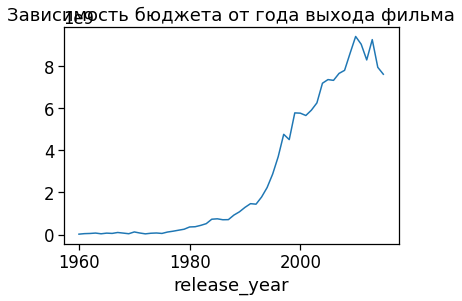

In [279]:
data.groupby('release_year')['budget'].sum().plot(title='Зависимость бюджета от года выхода фильма')

Бюджеты заметно выросли со временем, но в последнее время падают.

## Task 13

## Task 15

<AxesSubplot:>

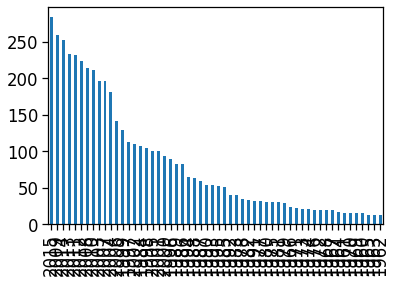

In [277]:
data[data['genres'].astype(str).str.contains('Drama')]['release_year'].value_counts().plot(kind="bar")
data[data['genres'].astype(str).str.contains(fav_genre)]['release_year'].value_counts().plot(kind="bar")

## Task 17

<AxesSubplot:title={'center':'Рейтинг по годам'}, xlabel='release_year'>

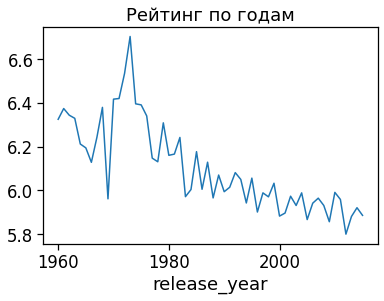

In [280]:
data.groupby('release_year')['vote_average'].mean().plot(title='Рейтинг по годам')

## Task 18

<AxesSubplot:title={'center':'Genres'}>

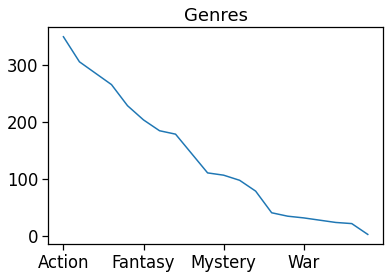

In [282]:
genres = data["genres"].str.split("|", expand=True).dropna().to_numpy().ravel()
pd.Series(genres).value_counts().plot(title = "Genres")